In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\SUVARCHALA\\Downloads\\Dataset .csv")

**Convert Categorical Variables**

In [3]:

# Handle missing values in 'Cuisines', 'Aggregate rating', 'Votes', 'City'
df = df.dropna(subset=['Cuisines', 'Aggregate rating', 'Votes', 'City'])

# Explode the 'Cuisines' column to handle multiple cuisines in a single entry
df['Cuisines'] = df['Cuisines'].str.split(', ')
df = df.explode('Cuisines')

**Visualize the distribution of ratings**

C:\Users\SUVARCHALA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


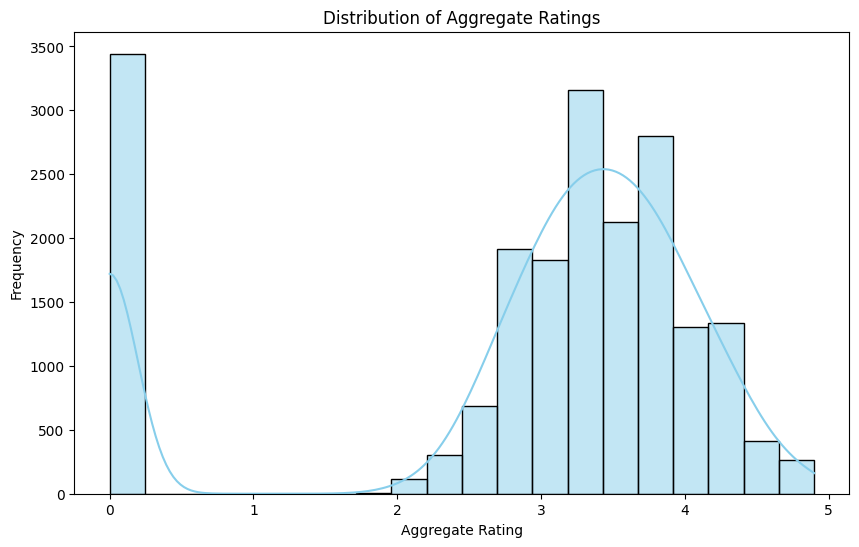

In [4]:
# Step 1: Visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()


**Compare the average ratings of different cuisines**

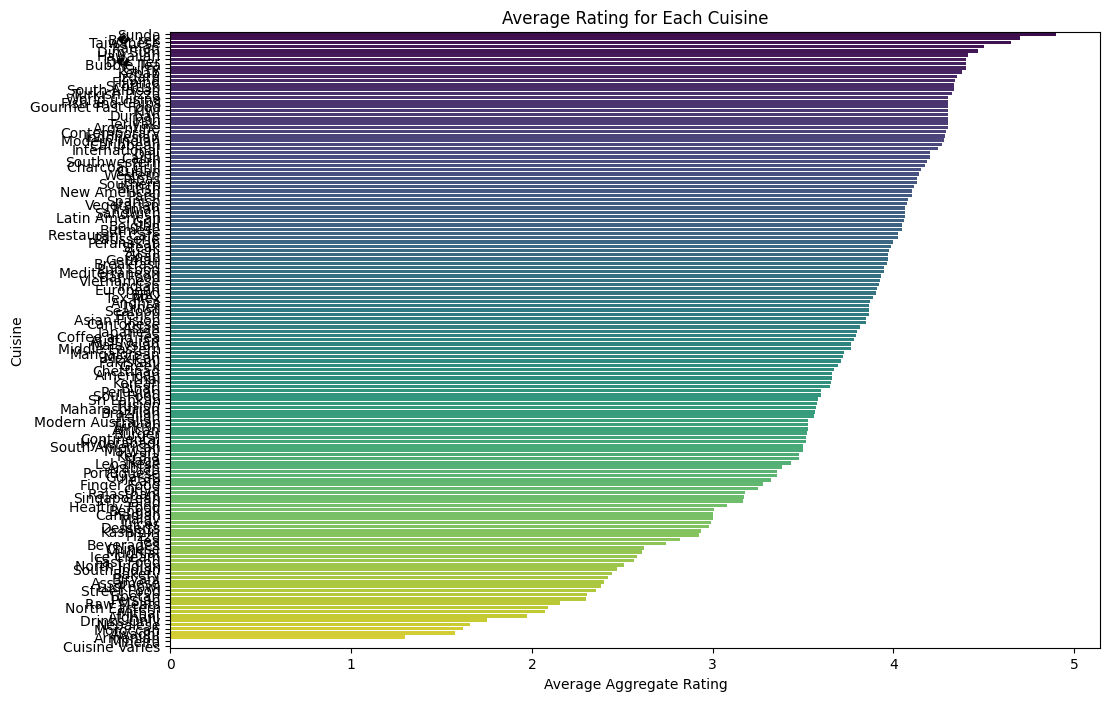

In [5]:
# Step 2: Compare the average ratings of different cuisines
avg_rating_per_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rating_per_cuisine.values, y=avg_rating_per_cuisine.index, palette='viridis')
plt.title('Average Rating for Each Cuisine')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Cuisine')
plt.show()

**Compare the average ratings of different cities**

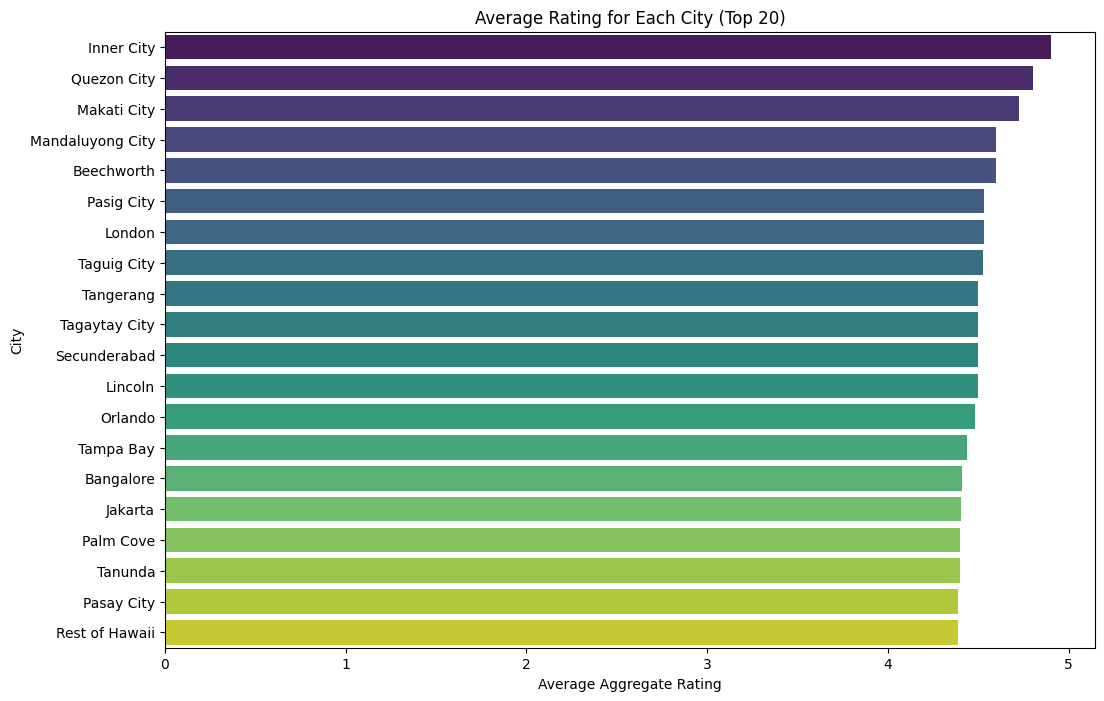

In [6]:

# Step 2: Compare the average ratings of different cities
avg_rating_per_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(20)  # Top 20 cities for better visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rating_per_city.values, y=avg_rating_per_city.index, palette='viridis')
plt.title('Average Rating for Each City (Top 20)')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('City')
plt.show()

**Visualize the relationship between various features and the target variable**

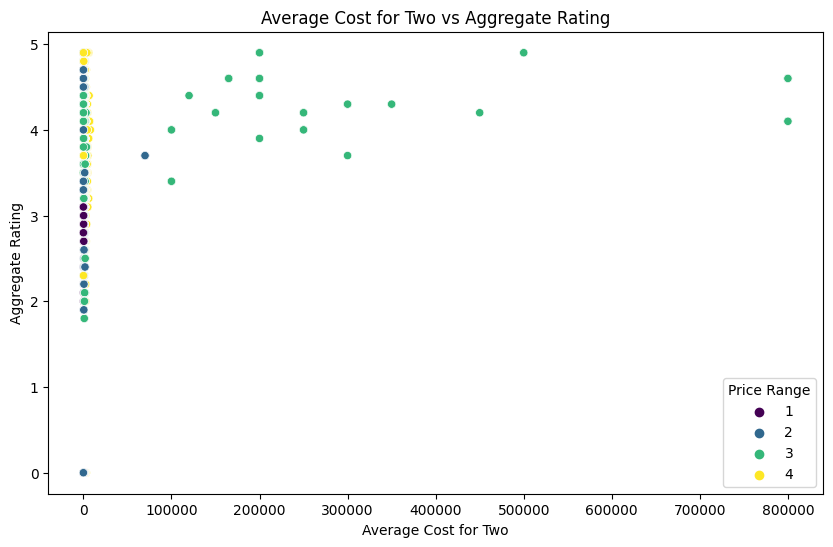

In [7]:
# Step 3: Visualize the relationship between various features and the target variable

# Scatter plot for 'Average Cost for two' vs 'Aggregate rating'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df, hue='Price range', palette='viridis')
plt.title('Average Cost for Two vs Aggregate Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.legend(title='Price Range')
plt.show()


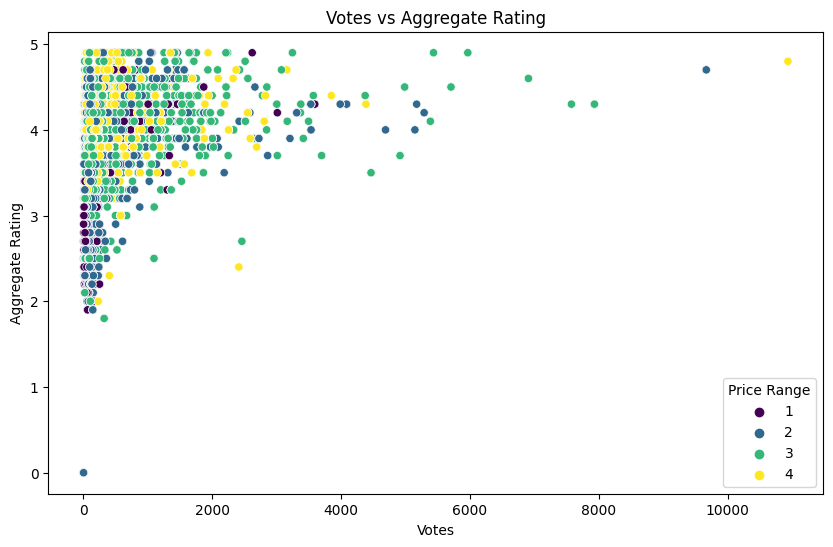

In [8]:
# Scatter plot for 'Votes' vs 'Aggregate rating'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, hue='Price range', palette='viridis')
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.legend(title='Price Range')
plt.show()

In [17]:
# Convert 'Has Table booking' and 'Has Online delivery' to binary numeric values
df['Has Table booking'] = df['Has Table booking'].apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)
df['Has Online delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)

# Check for non-numeric values in the selected columns again
selected_columns = ['Aggregate rating', 'Average Cost for two', 'Price range', 'Votes', 'Has Table booking', 'Has Online delivery']
for column in selected_columns:
    non_numeric_values = df[column].loc[df[column].apply(lambda x: not isinstance(x, (int, float)))]
    if not non_numeric_values.empty:
        print(f"Column '{column}' has non-numeric values: {non_numeric_values.unique()}")


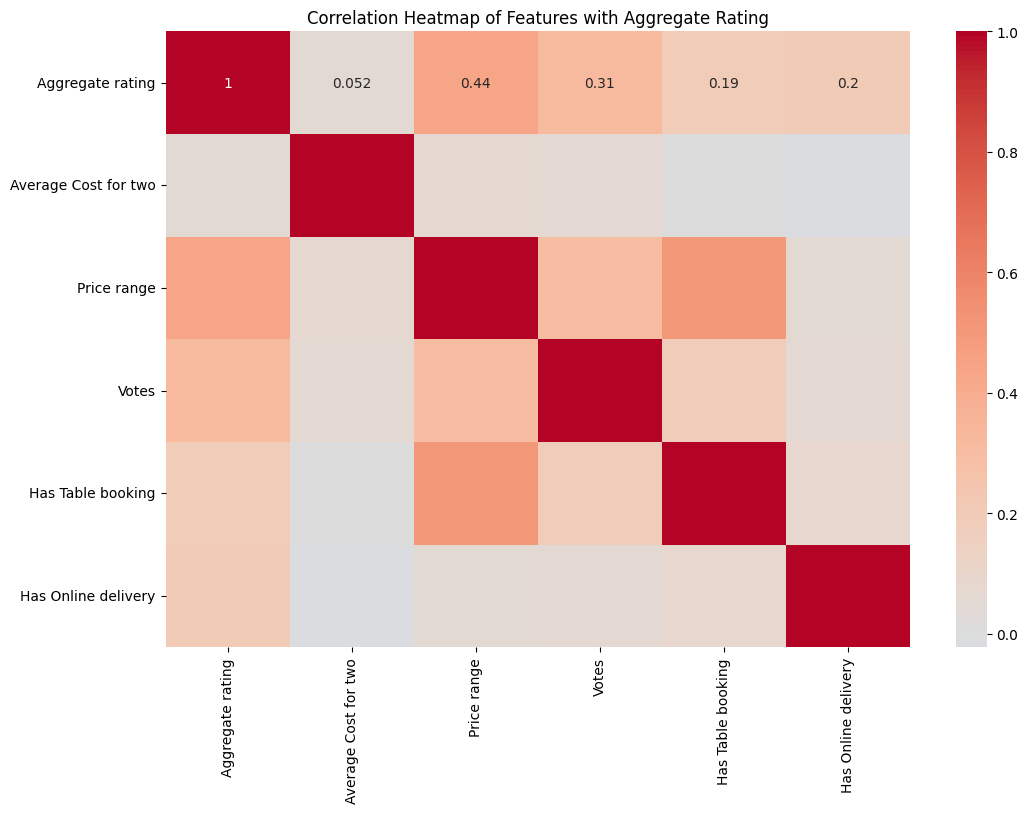

In [19]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features with Aggregate Rating')
plt.show()






